# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

## For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [3]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [4]:
df

,Notes,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03
1,NaN,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35
2,NaN,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66
3,NaN,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30
4,NaN,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...,...,...
12050,NaN,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,Texas,48.0,"Dec 31, 2011",2011/12/31,73.49
12053,Total,Texas,48.0,NaN,NaN,78.14


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [5]:
string_to_drop = 'Total'
df = df.drop(df[df['Notes'] == string_to_drop].index)
df = df.drop('Notes', axis=1)
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...,...
12048,Texas,48.0,"Dec 27, 2011",2011/12/27,56.67
12049,Texas,48.0,"Dec 28, 2011",2011/12/28,59.91
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61


>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df[['Month Day, Year', 'Date']]
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35,1979-01-02
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66,1979-01-03
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30,1979-01-04
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89,1979-01-05
...,...,...,...,...,...,...
12048,Texas,48.0,"Dec 27, 2011",2011/12/27,56.67,2011-12-27
12049,Texas,48.0,"Dec 28, 2011",2011/12/28,59.91,2011-12-28
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64,2011-12-29
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,1,1
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,1,2
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,1,3
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,1,4
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,1,5
...,...,...,...,...,...,...,...,...,...
12048,Texas,48.0,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,2011,12,27
12049,Texas,48.0,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,2011,12,28
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30


In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

Text(0.5, 1.0, 'Temperature Variation')

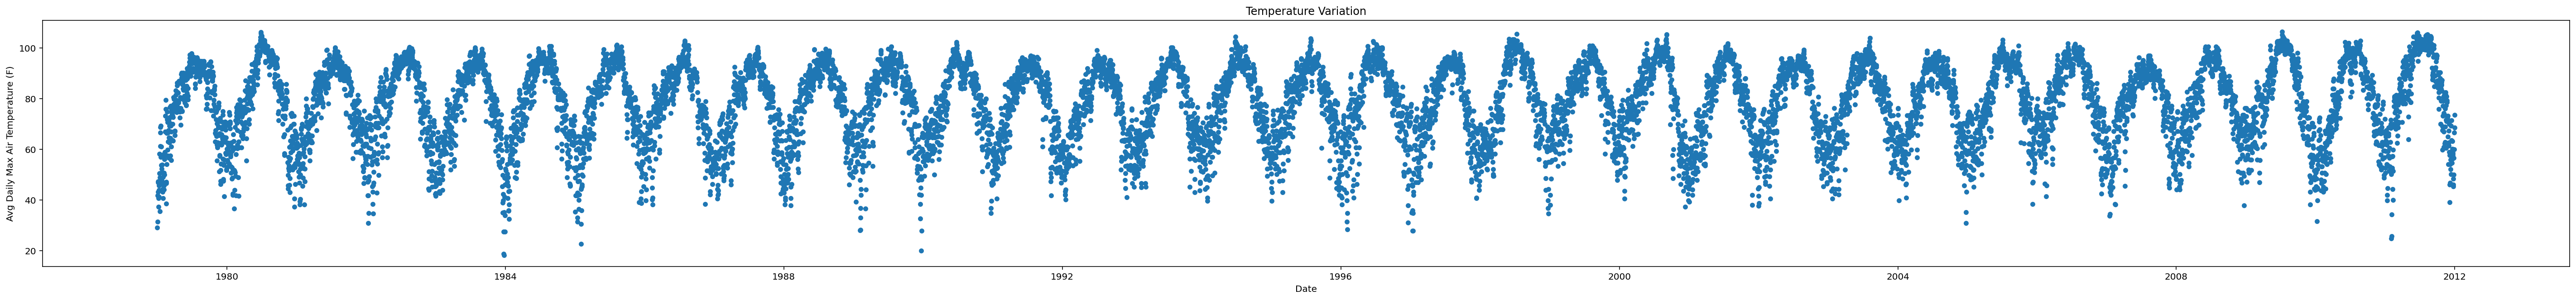

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

plt.xlabel('Date')
plt.ylabel('Avg Daily Max Air Temperature (F)')
plt.title('Temperature Variation') 


In [10]:
#The graph is just charting the rise and fall of temperatures, the consistent wave is likely due to the change in seasons. The fig size is changed so it is easier to see this change over a long range of time.

>5) Describe your plot.

### Adding colors for our graph

In [11]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): 
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] 

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

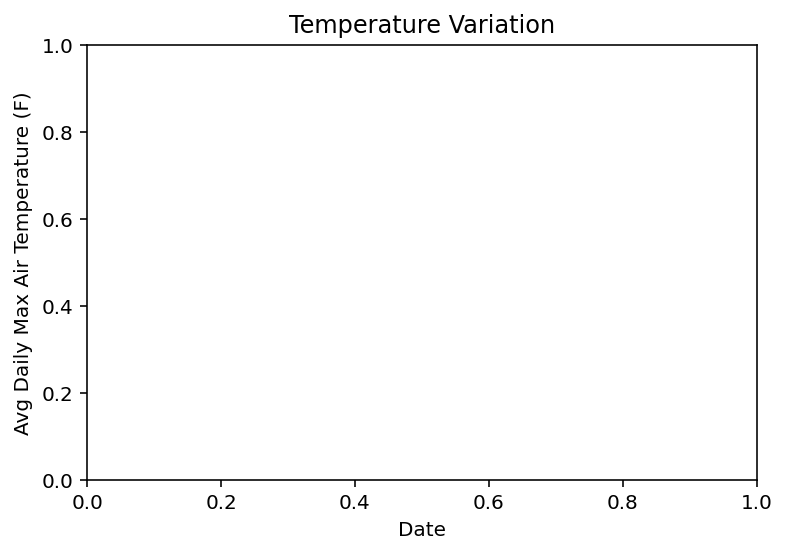

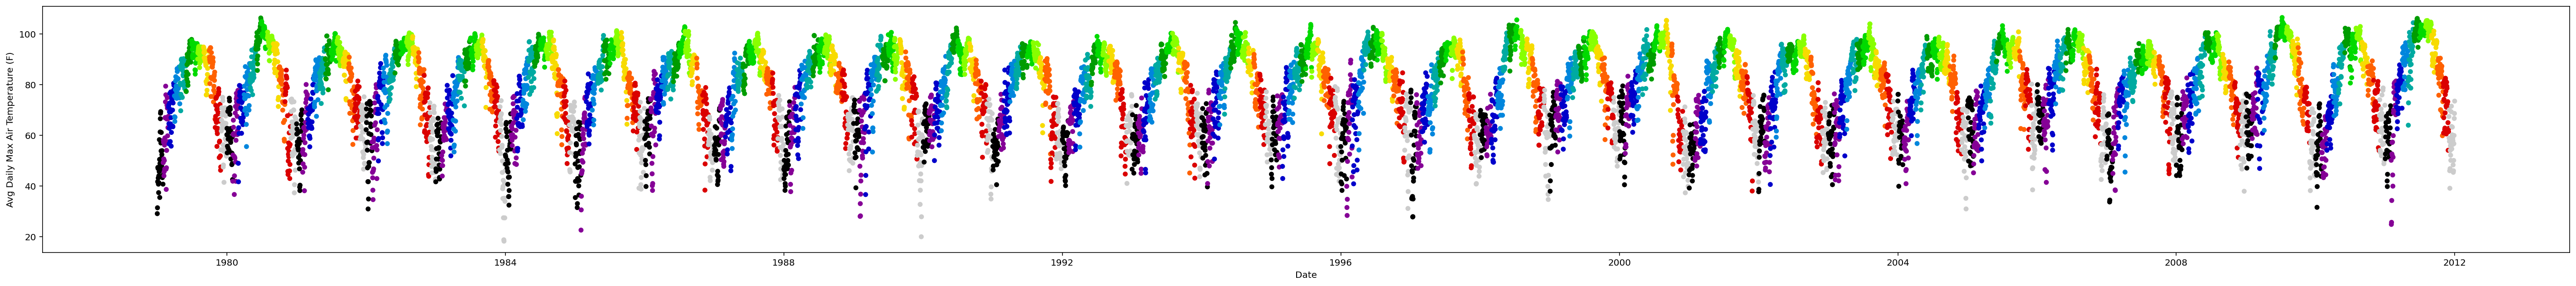

In [12]:
df['Date'] = pd.to_datetime(df['Date'])


plt.xlabel('Date')
plt.ylabel('Avg Daily Max Air Temperature (F)')
plt.title('Temperature Variation') 
cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N):
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)]
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c =df["color"])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [13]:
#selectedPeriod = (df["Date"] >="2003-7-1") & (df["Date"] < "2003-12-31")

#sixMonth=df["Date"][selectedPeriod]

#avgTemp = df["Avg Daily Max Air Temperature (F)"][selectedPeriod]

#color = df["color"][selectedPeriod]
#subset = pd.DataFrame({"Datess": sixMonth, "avgTemps" : avgTemp, "colors": color})

# a = df['Date'] > start;
# a = a 

df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.datetime(2003,7,1)
end_date = pd.datetime(2003,12,31)   

In [14]:
subset = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
subset

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
8947,Texas,48.0,"Jul 01, 2003",2003/07/01,92.38,2003-07-01,2003,7,1,10570176.0,#00da00
8948,Texas,48.0,"Jul 02, 2003",2003/07/02,95.15,2003-07-02,2003,7,2,10571040.0,#00da00
8949,Texas,48.0,"Jul 03, 2003",2003/07/03,94.73,2003-07-03,2003,7,3,10571904.0,#00da00
8950,Texas,48.0,"Jul 04, 2003",2003/07/04,91.35,2003-07-04,2003,7,4,10572768.0,#00da00
8951,Texas,48.0,"Jul 05, 2003",2003/07/05,89.10,2003-07-05,2003,7,5,10573632.0,#00da00
...,...,...,...,...,...,...,...,...,...,...,...
9125,Texas,48.0,"Dec 26, 2003",2003/12/26,70.31,2003-12-26,2003,12,26,10723968.0,#cccccc
9126,Texas,48.0,"Dec 27, 2003",2003/12/27,70.24,2003-12-27,2003,12,27,10724832.0,#cccccc
9127,Texas,48.0,"Dec 28, 2003",2003/12/28,58.07,2003-12-28,2003,12,28,10725696.0,#cccccc
9128,Texas,48.0,"Dec 29, 2003",2003/12/29,52.30,2003-12-29,2003,12,29,10726560.0,#cccccc


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

In [36]:
#subset.plot.scatter(x='Datess', y='avgTemps',figsize=(5,5), c ="colors")

#plt.xlabel('Date')
#plt.ylabel('Avg Daily Max Air Temperature (F)')
#plt.title('Temperature Variation') 
cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): 
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

subset['color']=[c[int(i-1)] for i in subset['Month'].astype(int)] 

/tmp/ipykernel_2335693/3500164208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['color']=[c[int(i-1)] for i in subset['Month'].astype(int)]


## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [37]:
subset

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
8947,Texas,48.0,"Jul 01, 2003",2003/07/01,92.38,2003-07-01,2003,7,1,10570176.0,#00da00
8948,Texas,48.0,"Jul 02, 2003",2003/07/02,95.15,2003-07-02,2003,7,2,10571040.0,#00da00
8949,Texas,48.0,"Jul 03, 2003",2003/07/03,94.73,2003-07-03,2003,7,3,10571904.0,#00da00
8950,Texas,48.0,"Jul 04, 2003",2003/07/04,91.35,2003-07-04,2003,7,4,10572768.0,#00da00
8951,Texas,48.0,"Jul 05, 2003",2003/07/05,89.10,2003-07-05,2003,7,5,10573632.0,#00da00
...,...,...,...,...,...,...,...,...,...,...,...
9125,Texas,48.0,"Dec 26, 2003",2003/12/26,70.31,2003-12-26,2003,12,26,10723968.0,#cccccc
9126,Texas,48.0,"Dec 27, 2003",2003/12/27,70.24,2003-12-27,2003,12,27,10724832.0,#cccccc
9127,Texas,48.0,"Dec 28, 2003",2003/12/28,58.07,2003-12-28,2003,12,28,10725696.0,#cccccc
9128,Texas,48.0,"Dec 29, 2003",2003/12/29,52.30,2003-12-29,2003,12,29,10726560.0,#cccccc


In [38]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [39]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [40]:
Y_pred = lin_reg(X,Y)

-0.0002597422232244934 2847.9537517003077


In [41]:
Y_pred

array([102.43273759, 102.20832031, 101.98390302, 101.75948574,
       101.53506846, 101.31065118, 101.0862339 , 100.86181662,
       100.63739934, 100.41298206, 100.18856478,  99.9641475 ,
        99.73973022,  99.51531293,  99.29089565,  99.06647837,
        98.84206109,  98.61764381,  98.39322653,  98.16880925,
        97.94439197,  97.71997469,  97.49555741,  97.27114013,
        97.04672285,  96.82230556,  96.59788828,  96.373471  ,
        96.14905372,  95.92463644,  95.70021916,  95.47580188,
        95.2513846 ,  95.02696732,  94.80255004,  94.57813276,
        94.35371547,  94.12929819,  93.90488091,  93.68046363,
        93.45604635,  93.23162907,  93.00721179,  92.78279451,
        92.55837723,  92.33395995,  92.10954267,  91.88512539,
        91.6607081 ,  91.43629082,  91.21187354,  90.98745626,
        90.76303898,  90.5386217 ,  90.31420442,  90.08978714,
        89.86536986,  89.64095258,  89.4165353 ,  89.19211802,
        88.96770073,  88.74328345,  88.51886617,  88.29

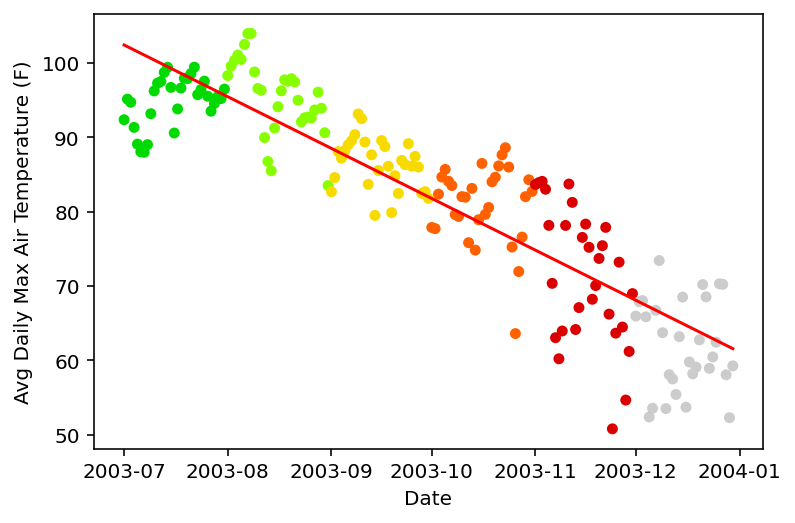

In [42]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot(subset['Date'].values, Y_pred, color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [43]:
#Slope:-0.0002597422232244934 Intercept:2847.9537517003077

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [44]:
print(min(Y_pred))
print(max(Y_pred))

61.58879246851984
102.43273758612486


In [45]:
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,1,1,2839968.0,#000000
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,1,2,2840832.0,#000000
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,1,3,2841696.0,#000000
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,1,4,2842560.0,#000000
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,1,5,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...,...
12048,Texas,48.0,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,2011,12,27,13249440.0,#cccccc
12049,Texas,48.0,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,2011,12,28,13250304.0,#cccccc
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29,13251168.0,#cccccc
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30,13252032.0,#cccccc


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [46]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [47]:
Y

array([29.03, 31.35, 41.66, ..., 66.64, 68.61, 73.49])

In [48]:
Y_pred = lin_reg(X,Y)

3.072410840971274e-07 75.67019246681011


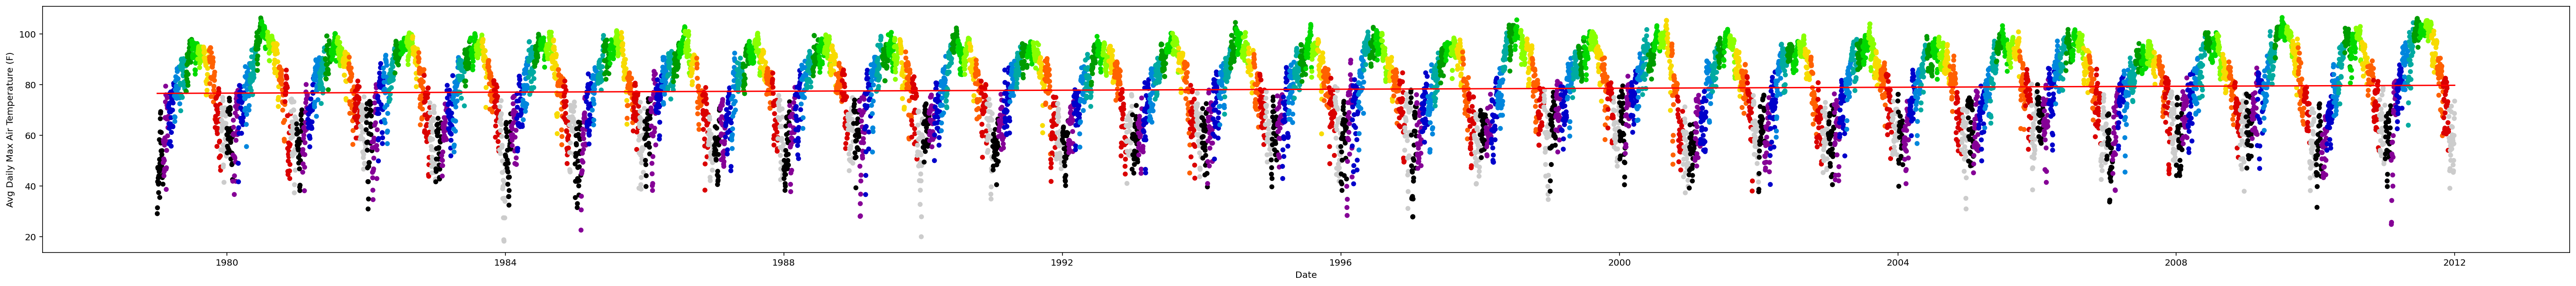

In [49]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize= (50,5))
plt.plot([min(df['Date'].values), max(df['Date'].values)],[min(Y_pred), max(Y_pred)], color='red')
plt.show()


>12) Is the slope positive or negative? What do you think that means?


In [50]:
#It is a positive slope, it is representative of global warming most likely.